# This Notebook contains plots 9 and 10c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple
from scipy.integrate import quad
import magpylib as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import shutil

/opt/miniconda3/envs/projectespana/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/ProjectEspana/oldpcbairbr/"
channel1_mat  = np.zeros((10, 10))  # Low Peak Channel 1
channel2_mat  = np.zeros((10, 10))  #High Peak Channel 1
channel3_mat  = np.zeros((10, 10))  #Low Peak Channel 2
channel4_mat  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        channel1_mat[x][y] = peak1
        channel2_mat[x][y] = peak2
    elif channel_value == "b":
        channel3_mat[x][y] = peak1
        channel4_mat[x][y] = peak2
print("DONE Processing")

DONE Processing


In [3]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/ProjectEspana/oldpcbporkbr3/"
test_channel1  = np.zeros((10, 10))  # Low Peak Channel 1
test_channel2  = np.zeros((10, 10))  #High Peak Channel 1
test_channel3  = np.zeros((10, 10))  #Low Peak Channel 2
test_channel4  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        test_channel1[x][y] = peak1
        test_channel2[x][y] = peak2
    elif channel_value == "b":
        test_channel3[x][y] = peak1
        test_channel4[x][y] = peak2
print("DONE Processing")

DONE Processing


In [4]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/ProjectEspana/oldpcbporkbr2/"
nrtest_channel1  = np.zeros((10, 10))  # Low Peak Channel 1
nrtest_channel2  = np.zeros((10, 10))  #High Peak Channel 1
nrtest_channel3  = np.zeros((10, 10))  #Low Peak Channel 2
nrtest_channel4  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        nrtest_channel1[x][y] = peak1
        nrtest_channel2[x][y] = peak2
    elif channel_value == "b":
        nrtest_channel3[x][y] = peak1
        nrtest_channel4[x][y] = peak2
print("DONE Processing")

DONE Processing


print(test_channel1)

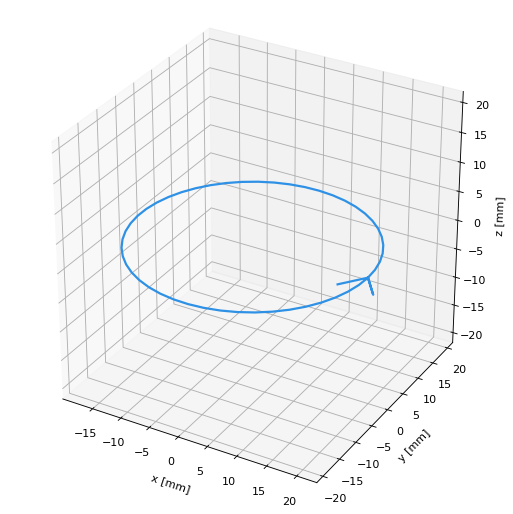

In [5]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
    print(x)
    x,y = x
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
    B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
    return np.abs(B1*B2)*10**k

def get_B1(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*y + 87.3 -170, 0.68 ,-250 + 83.9 + 10*x))[2]
    return B1

def get_B2(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B2=current_loop.getB((10*y + 87.3 -80, 0.68 , 83.9 + 10*x))[2]
    return B2

def get_B3(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B3=current_loop.getB((10*y + 87.3 -80, 0.68 , -250 + 83.9 + 10*x))[2]
    return B3

def get_B4(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B4=current_loop.getB((10*y + 87.3 - 170, 0.68 , 10*x + 83.9))[2]
    return B4

def get_signal_new(channel, coordinates,k):
    if channel == 0:
        BA = get_B1(coordinates)
        BB = get_B3(coordinates)
    elif channel == 1:
        BA = get_B1(coordinates)
        BB = get_B4(coordinates)
    elif channel == 2:
        BA = get_B2(coordinates)
        BB = get_B3(coordinates)
    elif channel == 3:
        BA = get_B2(coordinates)
        BB = get_B4(coordinates)

    return np.abs(BA * BB)*10**k


In [6]:
k_params = [np.log10(channel3_mat)[5,5] - np.log10(get_signal_new(0,(5,5),0)),
np.log10(channel1_mat)[5,5] - np.log10(get_signal_new(1,(5,5),0)),
np.log10(channel4_mat)[5,5] - np.log10(get_signal_new(2,(5,5),0)),
np.log10(channel2_mat)[5,5] - np.log10(get_signal_new(3,(5,5),0))]

In [7]:
X_Features = []
Y_Labels = []
x = np.arange(0,10,.1)
y = np.arange(0,10,.1)
for x_index in x:
    for y_index in y:
        Y_Labels.append([x_index,y_index])
        feature_ray = []
        for chan in range(0,4):
            feature_ray.append(np.log10(get_signal_new(chan,(x_index,y_index),k_params[chan])))
        X_Features.append(feature_ray)

analytical_modal = KNeighborsRegressor(n_neighbors=3)
analytical_modal.fit(X_Features,Y_Labels)

KNeighborsRegressor(n_neighbors=3)

In [8]:
error_mat = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        X_pred = [np.log10(test_channel3[i,j]),np.log10(test_channel1[i,j]),np.log10(test_channel4[i,j]),np.log10(test_channel2[i,j])]
        #X_pred = [test_channel3[i,j],test_channel2[i,j]]
        y=[i,j]
        x,y = analytical_modal.predict([X_pred])[0]
        error_mat[i,j] = np.sqrt((x-i)**2 + (y-j)**2)
        print("prediction",x,y)
        print("actual",i,j)
# plt.imshow(error_mat)
# print(np.median(error_mat))
# print(np.mean(error_mat))
# plt.colorbar()

prediction 0.3333333333333333 0.03333333333333333
actual 0 0
prediction 0.4666666666666666 0.8666666666666667
actual 0 1
prediction 0.6333333333333334 1.9666666666666668
actual 0 2
prediction 0.6666666666666669 3.1333333333333333
actual 0 3
prediction 0.7333333333333334 4.166666666666667
actual 0 4
prediction 0.6666666666666666 5.066666666666667
actual 0 5
prediction 0.7333333333333334 5.966666666666666
actual 0 6
prediction 0.8333333333333334 7.033333333333334
actual 0 7
prediction 0.8666666666666667 7.566666666666667
actual 0 8
prediction 0.9 8.3
actual 0 9
prediction 1.2 0.0
actual 1 0
prediction 1.366666666666667 0.9666666666666667
actual 1 1
prediction 1.4666666666666668 2.033333333333333
actual 1 2
prediction 1.5333333333333332 3.033333333333333
actual 1 3
prediction 1.5666666666666667 4.033333333333334
actual 1 4
prediction 1.6333333333333335 5.033333333333334
actual 1 5
prediction 1.6666666666666667 5.933333333333334
actual 1 6
prediction 1.7333333333333334 6.766666666666667
ac

In [9]:
error_mat_nrtest = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        X_pred = [np.log10(nrtest_channel3[i,j]),np.log10(nrtest_channel1[i,j]),np.log10(nrtest_channel4[i,j]),np.log10(nrtest_channel2[i,j])]
        #X_pred = [test_channel3[i,j],test_channel2[i,j]]
        y=[i,j]
        x,y = analytical_modal.predict([X_pred])[0]
        error_mat_nrtest[i,j] = np.sqrt((x-i)**2 + (y-j)**2)
        print("prediction",x,y)
        print("actual",i,j)
# plt.imshow(error_mat_nrtest)
# print(np.median(error_mat_nrtest))
# print(np.mean(error_mat_nrtest))
# plt.colorbar()

prediction 0.10000000000000002 0.0
actual 0 0
prediction 0.0 0.19999999999999998
actual 0 1
prediction 0.03333333333333333 1.4333333333333336
actual 0 2
prediction 0.13333333333333333 2.533333333333333
actual 0 3
prediction 0.2333333333333333 3.733333333333334
actual 0 4
prediction 0.3 4.800000000000001
actual 0 5
prediction 0.3666666666666667 5.833333333333333
actual 0 6
prediction 0.4000000000000001 6.7
actual 0 7
prediction 0.5333333333333333 7.666666666666667
actual 0 8
prediction 0.6000000000000001 8.700000000000001
actual 0 9
prediction 0.3 0.0
actual 1 0
prediction 0.6333333333333334 0.3333333333333333
actual 1 1
prediction 0.8333333333333334 1.4666666666666668
actual 1 2
prediction 0.9666666666666667 2.6333333333333333
actual 1 3
prediction 1.0666666666666667 3.733333333333333
actual 1 4
prediction 1.1333333333333335 4.933333333333334
actual 1 5
prediction 1.1333333333333335 5.733333333333333
actual 1 6
prediction 1.2333333333333334 6.666666666666667
actual 1 7
prediction 1.333

Text(0, 0.5, 'CDF')

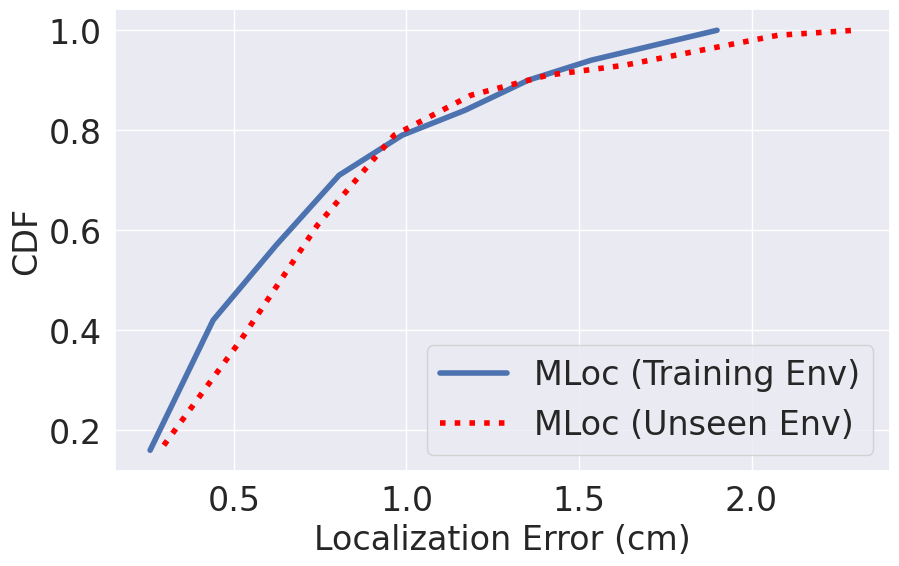

In [10]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,6))
counts, bin_edges = np.histogram (error_mat_nrtest, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=4,label='MLoc (Training Env)')
counts, bin_edges = np.histogram (error_mat, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=4, linestyle = "dotted", color='red' ,label='MLoc (Unseen Env)')
ax.tick_params(axis='both', which='major',labelsize=24)
ax.legend(fontsize=24, loc='lower right')
ax.set_xlabel('Localization Error (cm)',fontsize=24)
ax.set_ylabel('CDF',fontsize=24)

Multi-Point Localization

In [11]:
X_Features = []
Y_Labels = []
x = np.arange(0,10,.1)
y = np.arange(0,10,.1)
for x_index in x:
    for y_index in y:
        Y_Labels.append([x_index,y_index])        
        feature_ray=[np.log10(get_signal_new(0,(x_index,y_index),k_params[0])),np.log10(get_signal_new(3,(x_index,y_index),k_params[3]))]
        X_Features.append(feature_ray)

analytical_modal = KNeighborsRegressor(n_neighbors=3)
analytical_modal.fit(X_Features,Y_Labels)

KNeighborsRegressor(n_neighbors=3)

In [12]:
error_mat_nrtest_2 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        X_pred = [np.log10(nrtest_channel3[i,j]), np.log10(nrtest_channel2[i,j])]
        #X_pred = [test_channel3[i,j],test_channel2[i,j]]
        y=[i,j]
        x,y = analytical_modal.predict([X_pred])[0]
        error_mat_nrtest_2[i,j] = np.sqrt((x-i)**2 + (y-j)**2)
        print("prediction",x,y)
        print("actual",i,j)
# plt.imshow(error_mat_nrtest_2)
# print(np.median(error_mat_nrtest_2))
# print(np.mean(error_mat_nrtest_2))
# plt.colorbar()

prediction 0.0 8.200000000000001
actual 0 0
prediction 0.0 4.933333333333334
actual 0 1
prediction 0.0 3.033333333333333
actual 0 2
prediction 0.10000000000000002 4.266666666666667
actual 0 3
prediction 0.20000000000000004 3.8000000000000003
actual 0 4
prediction 0.4000000000000001 3.8000000000000003
actual 0 5
prediction 0.7000000000000001 3.8000000000000003
actual 0 6
prediction 1.0 3.3000000000000003
actual 0 7
prediction 1.3 2.733333333333333
actual 0 8
prediction 1.6666666666666667 8.266666666666667
actual 0 9
prediction 0.10000000000000002 8.4
actual 1 0
prediction 0.4000000000000001 5.0
actual 1 1
prediction 0.7000000000000001 2.9
actual 1 2
prediction 0.9 4.333333333333333
actual 1 3
prediction 1.0 3.3000000000000003
actual 1 4
prediction 1.0 4.366666666666667
actual 1 5
prediction 1.3 4.0
actual 1 6
prediction 1.6000000000000003 4.366666666666667
actual 1 7
prediction 1.8 4.766666666666667
actual 1 8
prediction 1.9666666666666668 8.466666666666667
actual 1 9
prediction 1.26666

Text(0, 0.5, 'CDF')

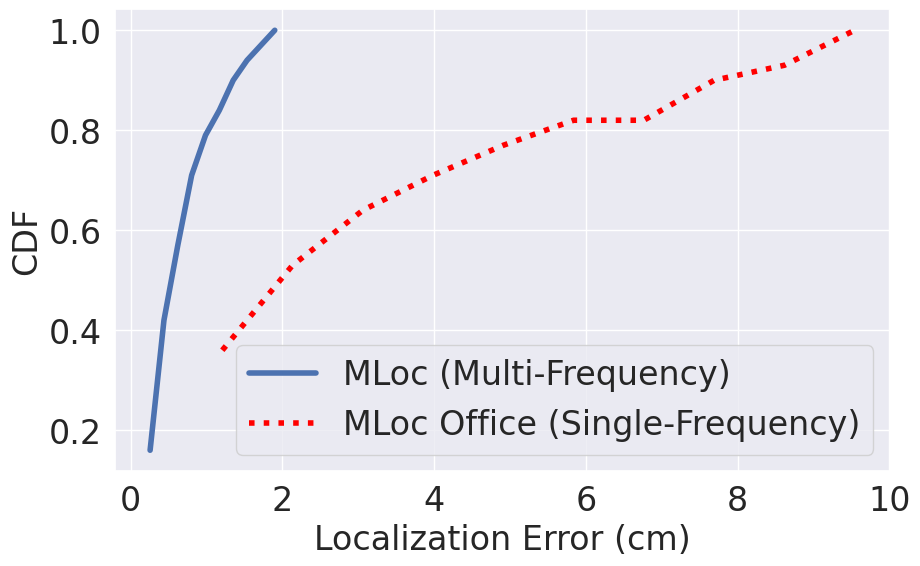

In [13]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,6))
counts, bin_edges = np.histogram (error_mat_nrtest, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=4,label='MLoc (Multi-Frequency)')
counts, bin_edges = np.histogram (error_mat_nrtest_2, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=4, linestyle = "dotted", color='red', label='MLoc Office (Single-Frequency)')
ax.tick_params(axis='both', which='major',labelsize=24)
ax.legend(fontsize=24, loc='lower right')
ax.set_xlabel('Localization Error (cm)',fontsize=24)
ax.set_ylabel('CDF',fontsize=24)